In [2]:
import pandas as pd
import numpy as np

# Define the data
data = {
    "2-year": [1.69, 1.81, 1.81, 1.79, 1.79, 1.83, 1.81, 1.81, 1.83, 1.81, 1.82, 1.82, 1.80, 1.78, 1.79],
    "3-year": [2.58, 2.71, 2.72, 2.78, 2.77, 2.75, 2.71, 2.72, 2.76, 2.73, 2.75, 2.75, 2.73, 2.71, 2.71],
    "5-year": [3.57, 3.69, 3.70, 3.77, 3.77, 3.73, 3.72, 3.74, 3.77, 3.75, 3.77, 3.76, 3.75, 3.72, 3.71],
    "10-year": [4.63, 4.73, 4.74, 4.81, 4.80, 4.79, 4.76, 4.77, 4.80, 4.77, 4.80, 4.80, 4.78, 4.73, 4.73],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    2-year  3-year  5-year  10-year
0     1.69    2.58    3.57     4.63
1     1.81    2.71    3.69     4.73
2     1.81    2.72    3.70     4.74
3     1.79    2.78    3.77     4.81
4     1.79    2.77    3.77     4.80
5     1.83    2.75    3.73     4.79
6     1.81    2.71    3.72     4.76
7     1.81    2.72    3.74     4.77
8     1.83    2.76    3.77     4.80
9     1.81    2.73    3.75     4.77
10    1.82    2.75    3.77     4.80
11    1.82    2.75    3.76     4.80
12    1.80    2.73    3.75     4.78
13    1.78    2.71    3.72     4.73
14    1.79    2.71    3.71     4.73


In [3]:
# Extracting columns for T2, T3, T5, and T10
T2 = df['2-year'].values
T3 = df['3-year'].values
T5 = df['5-year'].values
T10 = df['10-year'].values

# Creating matrix A with a column of ones and columns for T2, T5, T10
A = np.column_stack((np.ones(T2.shape), T2, T5, T10))

# Calculating the coefficients using the normal equation
y = np.linalg.inv(A.T @ A) @ A.T @ T3

# Calculating the predictions and the error
T3_pred = A @ y
error = np.linalg.norm(T3 - T3_pred)

print("Coefficients (a, b1, b2, b3):", y)
print("Approximation error:", error)


Coefficients (a, b1, b2, b3): [-1.27202812  0.12720817  0.3340453   0.52977688]
Approximation error: 0.04301298358083895


In [4]:
A = np.column_stack((np.ones(len(df)), df['2-year'], df['5-year'], df['10-year']))
df['T3_OLS_Pred'] = A.dot(y)

# Calculate linear interpolation as described in the problem
df['T3_linear_interp'] = (2/3) * df['2-year'] + (1/3) * df['5-year']

# Calculate the approximation errors
error_OLS = np.linalg.norm(df['3-year'] - df['T3_OLS_Pred'])
error_linear_interp = np.linalg.norm(df['3-year'] - df['T3_linear_interp'])
print("error_linear_interp", error_linear_interp)
df

error_linear_interp 1.0986961970141398


,2-year,3-year,5-year,10-year,T3_OLS_Pred,T3_linear_interp
0,1.69,2.58,3.57,4.63,2.588362,2.316667
1,1.81,2.71,3.69,4.73,2.696690,2.436667
2,1.81,2.72,3.70,4.74,2.705329,2.440000
3,1.79,2.78,3.77,4.81,2.763252,2.450000
4,1.79,2.77,3.77,4.80,2.757954,2.450000
5,1.83,2.75,3.73,4.79,2.744383,2.463333
6,1.81,2.71,3.72,4.76,2.722605,2.446667
7,1.81,2.72,3.74,4.77,2.734584,2.453333
8,1.83,2.76,3.77,4.80,2.763043,2.476667
9,1.81,2.73,3.75,4.77,2.737924,2.456667


In [5]:
print(df.to_latex(index=False, escape=True, float_format="%.2f"))

\begin{tabular}{rrrrrr}
\toprule
2-year & 3-year & 5-year & 10-year & T3\_OLS\_Pred & T3\_linear\_interp \\
\midrule
1.69 & 2.58 & 3.57 & 4.63 & 2.59 & 2.32 \\
1.81 & 2.71 & 3.69 & 4.73 & 2.70 & 2.44 \\
1.81 & 2.72 & 3.70 & 4.74 & 2.71 & 2.44 \\
1.79 & 2.78 & 3.77 & 4.81 & 2.76 & 2.45 \\
1.79 & 2.77 & 3.77 & 4.80 & 2.76 & 2.45 \\
1.83 & 2.75 & 3.73 & 4.79 & 2.74 & 2.46 \\
1.81 & 2.71 & 3.72 & 4.76 & 2.72 & 2.45 \\
1.81 & 2.72 & 3.74 & 4.77 & 2.73 & 2.45 \\
1.83 & 2.76 & 3.77 & 4.80 & 2.76 & 2.48 \\
1.81 & 2.73 & 3.75 & 4.77 & 2.74 & 2.46 \\
1.82 & 2.75 & 3.77 & 4.80 & 2.76 & 2.47 \\
1.82 & 2.75 & 3.76 & 4.80 & 2.76 & 2.47 \\
1.80 & 2.73 & 3.75 & 4.78 & 2.74 & 2.45 \\
1.78 & 2.71 & 3.72 & 4.73 & 2.70 & 2.43 \\
1.79 & 2.71 & 3.71 & 4.73 & 2.70 & 2.43 \\
\bottomrule
\end{tabular}



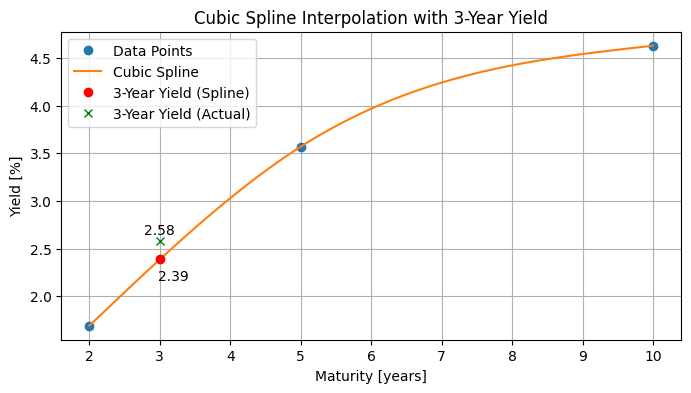

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Redefine the yield data after reset
years = [2, 5, 10]
yields = [1.69, 3.57, 4.63]
exact_3y_yield = 2.58  # Exact 3-year yield value from the original data

# Create a cubic spline interpolation
cs = CubicSpline(years, yields, bc_type="natural")
yield_at_3y = cs(3)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(years, yields, 'o', label='Data Points')
plt.plot(np.linspace(2, 10, 100), cs(np.linspace(2, 10, 100)), label='Cubic Spline')
plt.plot(3, yield_at_3y, 'ro', label='3-Year Yield (Spline)')  # Plot the spline value at 3 years
plt.plot(3, exact_3y_yield, 'gx', label='3-Year Yield (Actual)')  # Plot the actual data point at 3 years

# Annotate the numerical values
plt.annotate(f'{yield_at_3y:.2f}', (3, yield_at_3y), textcoords="offset points", xytext=(10,-15), ha='center')
plt.annotate(f'{exact_3y_yield:.2f}', (3, exact_3y_yield), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Maturity [years]')
plt.ylabel('Yield [%]')
plt.title('Cubic Spline Interpolation with 3-Year Yield')
plt.legend(['Data Points', 'Cubic Spline', '3-Year Yield (Spline)', '3-Year Yield (Actual)'])
plt.grid(True)
plt.savefig("sample_cspline.pdf")


In [8]:
# Define a function to perform cubic spline interpolation for each row
def cubic_spline_3y(row):
    years = np.array([2, 5, 10])
    yields = np.array([row['2-year'], row['5-year'], row['10-year']])
    cs = CubicSpline(years, yields, bc_type="natural")
    ret = cs(3).item()
    if not isinstance(ret, float):
        print(f"{row} outcome {ret} is not float but {type(ret)}")
    return ret

# Apply cubic spline interpolation to each row
ret = df.apply(cubic_spline_3y, axis=1)
df['T3_cubic_spline'] = ret

print(df.to_latex(index=False, escape=True, float_format="%.2f"))

\begin{tabular}{rrrrrrr}
\toprule
2-year & 3-year & 5-year & 10-year & T3\_OLS\_Pred & T3\_linear\_interp & T3\_cubic\_spline \\
\midrule
1.69 & 2.58 & 3.57 & 4.63 & 2.59 & 2.32 & 2.39 \\
1.81 & 2.71 & 3.69 & 4.73 & 2.70 & 2.44 & 2.51 \\
1.81 & 2.72 & 3.70 & 4.74 & 2.71 & 2.44 & 2.51 \\
1.79 & 2.78 & 3.77 & 4.81 & 2.76 & 2.45 & 2.53 \\
1.79 & 2.77 & 3.77 & 4.80 & 2.76 & 2.45 & 2.53 \\
1.83 & 2.75 & 3.73 & 4.79 & 2.74 & 2.46 & 2.53 \\
1.81 & 2.71 & 3.72 & 4.76 & 2.72 & 2.45 & 2.52 \\
1.81 & 2.72 & 3.74 & 4.77 & 2.73 & 2.45 & 2.53 \\
1.83 & 2.76 & 3.77 & 4.80 & 2.76 & 2.48 & 2.55 \\
1.81 & 2.73 & 3.75 & 4.77 & 2.74 & 2.46 & 2.53 \\
1.82 & 2.75 & 3.77 & 4.80 & 2.76 & 2.47 & 2.54 \\
1.82 & 2.75 & 3.76 & 4.80 & 2.76 & 2.47 & 2.54 \\
1.80 & 2.73 & 3.75 & 4.78 & 2.74 & 2.45 & 2.52 \\
1.78 & 2.71 & 3.72 & 4.73 & 2.70 & 2.43 & 2.50 \\
1.79 & 2.71 & 3.71 & 4.73 & 2.70 & 2.43 & 2.50 \\
\bottomrule
\end{tabular}



In [48]:
df.drop(columns="T3_cubic_spline", inplace=True)

In [11]:
np.linalg.norm(df["T3_cubic_spline"]-df["T3_OLS_Pred"])

0.816543071260278